In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.insert(0, '/home/er647/projects/feature-wise-active-learning')
sys.path.insert(0, '/home/er647/projects/feature-wise-active-learning/src')
sys.path.insert(0, '/home/er647/projects/feature-wise-active-learning/notebooks')

In [20]:
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import datetime
from utils import *
# from _utils import filter_df_on_conditions, make_subplots
import seaborn as sns
from functools import partial

In [5]:
datetime.datetime.now(datetime.timezone.utc).isoformat()

'2024-01-30T15:55:21.944529+00:00'

In [7]:
# wandb.init(project="fwal",entity="evangeorgerex")
api = wandb.Api(timeout=60) #, entity='evangeorgerex')

In [11]:
# Define the project and sweep ID
entity = "evangeorgerex"
project_name = "fwal"
sweep_id = "5mbq11e0"

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project_name}/{sweep_id}")

# Iterate over runs in the sweep
# for run in sweep.runs:
#     print(f"Run ID: {run.id}, Run Name: {run.name}, Run State: {run.state}")

    # You can also access other details of the run
    # For example, to get the config of each run:
    # print(run.config)

    # And to get summary metrics of each run:
    # print(run.summary)
print(len(sweep.runs))


150


In [12]:
runs_df = transforms_runs_into_dataframe(sweep.runs)
print(runs_df.shape)

(150, 161)


In [ ]:
### Optional commands
# add_tag_and_update(runs, TAG)

# - run.created_at
# - run.config.keys()
# - run.summary._json_dict['bestmodel_train/balanced_accuracy']

In [13]:
runs_df.columns

Index(['name', 'id', 'bestmodel_test/reconstruction_loss',
       'train/cross_entropy_loss', 'bestmodel_test/total_loss',
       'bestmodel_train/F1_weighted', 'bestmodel_valid/reconstruction_loss',
       'epoch', 'valid/AUROC_weighted', 'bestmodel_valid_y_hat',
       ...
       'cosine_warm_restart_t_mult', 'cosine_warm_restart_eta_min',
       'trained_FWAL_model_run_name', 'sparsity_gene_embedding_size',
       'sparsity_gene_embedding_type', 'nonlinearity_weight_predictor',
       'evaluate_with_sampled_datasets', 'sparsity_regularizer_hyperparam',
       'layers_for_hidden_representation', 'only_test_time_intervention_eval'],
      dtype='object', length=161)

In [ ]:
runs_df['be']

In [43]:
runs_df[runs_df['dataset']=='simple_linear_synth'].head(5)['best_mask_parameters', 'valid/sparsity_loss']

KeyError: ('best_mask_parameters', 'valid/sparsity_loss')

In [30]:
runs_df['valid/sparsity_loss'][0]

1937500032.0

In [34]:
runs_df_copy = runs_df.copy()

In [35]:
runs_df = runs_df[runs_df['sparsity_regularizer_hyperparam']<1000000000]

In [36]:
runs_df['sparsity_regularizer_hyperparam'].value_counts()


1000000    30
1000       30
1          30
0          30
Name: sparsity_regularizer_hyperparam, dtype: int64

Text(0, 0.5, 'Best Model Valid Cross Entropy Loss')

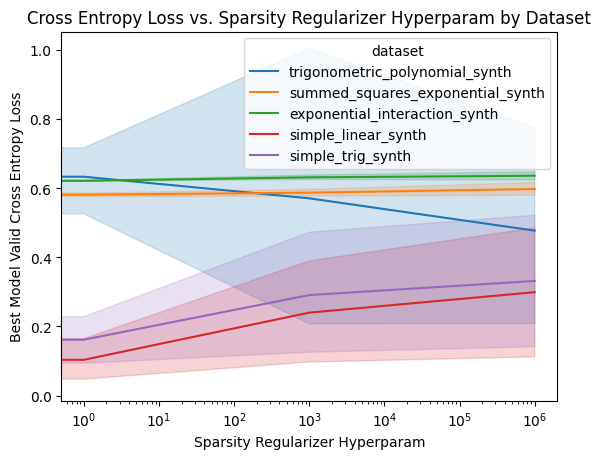

In [37]:
sns.lineplot(data=runs_df, x='sparsity_regularizer_hyperparam', y='valid/cross_entropy_loss', hue='dataset')

plt.xscale('log')


# Customize the plot
plt.title("Cross Entropy Loss vs. Sparsity Regularizer Hyperparam by Dataset")
plt.xlabel("Sparsity Regularizer Hyperparam")
plt.ylabel("Best Model Valid Cross Entropy Loss")

Text(0, 0.5, 'Best Model Valid Reconstruction Loss')

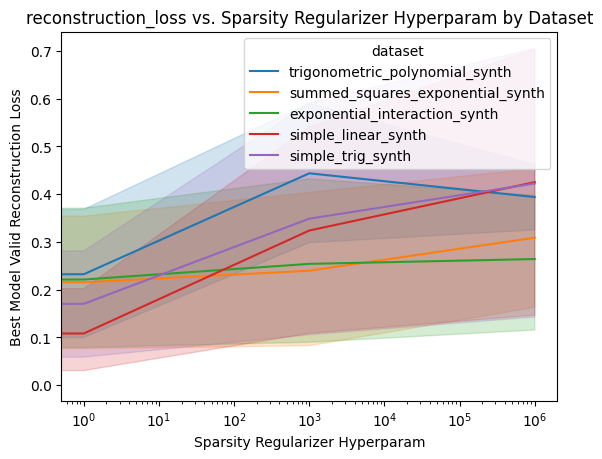

In [38]:
sns.lineplot(data=runs_df, x='sparsity_regularizer_hyperparam', y='valid/reconstruction_loss', hue='dataset')

plt.xscale('log')


# Customize the plot
plt.title("reconstruction_loss vs. Sparsity Regularizer Hyperparam by Dataset")
plt.xlabel("Sparsity Regularizer Hyperparam")
plt.ylabel("Best Model Valid Reconstruction Loss")

Text(0, 0.5, 'Best Model Valid Sparsity Loss')

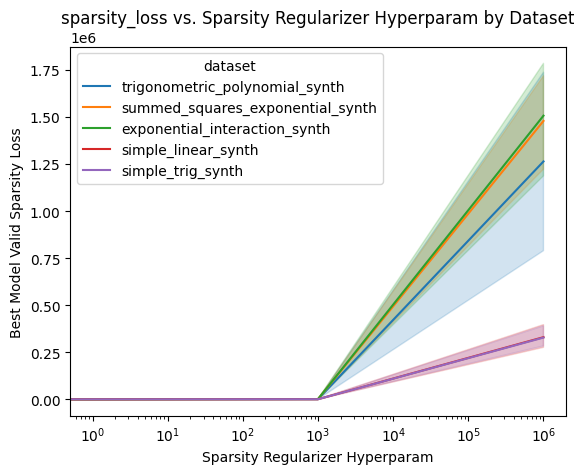

In [40]:
sns.lineplot(data=runs_df, x='sparsity_regularizer_hyperparam', y='valid/sparsity_loss', hue='dataset')

plt.xscale('log')


# Customize the plot
plt.title("sparsity_loss vs. Sparsity Regularizer Hyperparam by Dataset")
plt.xlabel("Sparsity Regularizer Hyperparam")
plt.ylabel("Best Model Valid Sparsity Loss")

In [17]:
runs_df['dataset'].value_counts()

trigonometric_polynomial_synth      30
summed_squares_exponential_synth    30
exponential_interaction_synth       30
simple_linear_synth                 30
simple_trig_synth                   30
Name: dataset, dtype: int64

In [ ]:
runs_df['bestmodel_valid/cross_entropy_loss']

In [19]:
runs_df['best_mask_parameters'].head()

0    [-0.8734390139579773, -1.003793478012085, -0.9...
1    [-0.906295895576477, -1.0336754322052002, -1.0...
2    [-0.9349806308746338, -1.059366226196289, -1.0...
3    [-0.6455142498016357, -0.732622504234314, -0.7...
4    [0.98233300447464, 0.8575429916381836, 0.94713...
Name: best_mask_parameters, dtype: object

In [7]:
pd.set_option('display.max_columns', None)
runs_df[
    ['id',
    #  'lr','gamma',
     'mask_type',
     'sparsity_regularizer_hyperparam',
    #  'bestmodel_valid/balanced_accuracy','bestmodel_valid/reconstruction_loss','bestmodel_valid/sparsity_loss',
     'best_mask_parameters']
    ]

,id,mask_type,sparsity_regularizer_hyperparam,best_mask_parameters
0,ikhki7dh,probabilistic,1000.0,"[0.3366183936595917, 0.1287771463394165, 0.234..."
1,aqe3jozq,probabilistic,1000.0,"[0.3365437388420105, 0.12873981893062592, 0.23..."
2,wiy9fpyv,probabilistic,1000.0,"[0.3365899324417114, 0.12876291573047638, 0.23..."
3,ek3m1i82,probabilistic,1000.0,"[0.3365899324417114, 0.12876291573047638, 0.23..."
4,begatpu9,probabilistic,1000.0,"[0.33658725023269653, 0.12876157462596893, 0.2..."
...,...,...,...,...
195,zz8x59c5,sigmoid,0.0,"[0.3403615653514862, 0.24742859601974487, 0.38..."
196,kv4burnd,sigmoid,0.0,"[0.3523191809654236, 0.2648531198501587, 0.382..."
197,99wqap9g,sigmoid,0.0,"[0.37576863169670105, 0.2500225603580475, 0.36..."
198,k5g0jq4i,sigmoid,0.0,"[0.3704529404640198, 0.2280469834804535, 0.353..."


In [16]:
# Splitting the array in 'best_mask_parameters' into individual columns
parameters_df = pd.DataFrame(runs_df['best_mask_parameters'].to_list(), columns=[f'parameter_{i}' for i in range(1, 6)])
parameters_df = pd.concat([runs_df, parameters_df], axis=1)



In [23]:
df = parameters_df
columns = [f'parameter_{i}' for i in range(1, 6)]
columns.extend(['mask_type','dataset',
                # 'repeat_id','test_split',
                'bestmodel_valid/balanced_accuracy','bestmodel_valid/reconstruction_loss','bestmodel_valid/sparsity_loss'])
df = df[df['sparsity_regularizer_hyperparam']==1]
df[columns].groupby(['mask_type','dataset']).agg('mean')

parameter_1  parameter_2  parameter_3  \
mask_type     dataset                                                    
probabilistic simple_synth          0.336579     0.128757     0.234387   
              very_simple_synth     0.336576     0.128756     0.234386   
sigmoid       simple_synth         -1.943436    -1.864626    -2.083116   
              very_simple_synth    -2.313782    -2.586958    -2.585783   

                                 parameter_4  parameter_5  \
mask_type     dataset                                       
probabilistic simple_synth          0.230258    -1.122440   
              very_simple_synth     0.230256    -1.122429   
sigmoid       simple_synth         -2.043080    -3.346113   
              very_simple_synth    -2.505562    -3.927479   

                                 bestmodel_valid/balanced_accuracy  \
mask_type     dataset                                                
probabilistic simple_synth                                0.914035   
              very_simple_synth                           0.930208   
sigmoid       simple_synth                                0.980435   
              very_simple_synth                           0.995750   

                                 bestmodel_valid/reconstruction_loss  \
mask_type     dataset                                                  
probabilistic simple_synth                                  0.183964   
              very_simple_synth                             0.172642   
sigmoid       simple_synth                                  0.009447   
              very_simple_synth                             0.001652   

                                 bestmodel_valid/sparsity_loss  
mask_type     dataset                                           
probabilistic simple_synth                            2.518277  
              very_simple_synth                       2.496519  
sigmoid       simple_synth                            0.943999  
              very_simple_synth                       0.413094

In [26]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_df = df
sigmoid_df[["parameter_1", "parameter_2", "parameter_3", "parameter_4", "parameter_5"]] = sigmoid_df[["parameter_1", "parameter_2", "parameter_3", "parameter_4", "parameter_5"]].apply(sigmoid)
sigmoid_df[columns].groupby(['mask_type','dataset']).agg('mean')

/tmp/ipykernel_4138728/3650782278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigmoid_df[["parameter_1", "parameter_2", "parameter_3", "parameter_4", "parameter_5"]] = sigmoid_df[["parameter_1", "parameter_2", "parameter_3", "parameter_4", "parameter_5"]].apply(sigmoid)
/tmp/ipykernel_4138728/3650782278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigmoid_df[["parameter_1", "parameter_2", "parameter_3", "parameter_4", "parameter_5"]] = sigmoid_df[["parameter_1", "parameter_2", "parameter_3", 

parameter_1  parameter_2  parameter_3  \
mask_type     dataset                                                    
probabilistic simple_synth          0.583359     0.532145     0.558330   
              very_simple_synth     0.583359     0.532145     0.558330   
sigmoid       simple_synth          0.126166     0.134857     0.111661   
              very_simple_synth     0.090106     0.070077     0.070227   

                                 parameter_4  parameter_5  \
mask_type     dataset                                       
probabilistic simple_synth          0.557311     0.245559   
              very_simple_synth     0.557311     0.245561   
sigmoid       simple_synth          0.115670     0.034357   
              very_simple_synth     0.075567     0.019369   

                                 bestmodel_valid/balanced_accuracy  \
mask_type     dataset                                                
probabilistic simple_synth                                0.914035   
              very_simple_synth                           0.930208   
sigmoid       simple_synth                                0.980435   
              very_simple_synth                           0.995750   

                                 bestmodel_valid/reconstruction_loss  \
mask_type     dataset                                                  
probabilistic simple_synth                                  0.183964   
              very_simple_synth                             0.172642   
sigmoid       simple_synth                                  0.009447   
              very_simple_synth                             0.001652   

                                 bestmodel_valid/sparsity_loss  
mask_type     dataset                                           
probabilistic simple_synth                            2.518277  
              very_simple_synth                       2.496519  
sigmoid       simple_synth                            0.943999  
              very_simple_synth                       0.413094

In [ ]:
### Plot
pd.options.display.float_format = '{:,.2f}'.format

grouped = runs_df.groupby(['dataset', 'embedding_type'])
g1 = grouped.agg({'bestmodel_train/balanced_accuracy': ['mean', 'std']})*100
g2 = grouped.agg({'bestmodel_test/balanced_accuracy': ['mean', 'std']})*100
res = pd.concat([g1, g2], axis=1).round(decimals=2)
res

In [ ]:
# file_name = 'test'
# res.to_csv(f'/home/er647/projects/feature-wise-active-learning/compute_results/csv/{file_name}.csv')
# res.to_excel(f'/home/er647/projects/feature-wise-active-learning/compute_results/csv/{file_name}.xlsx')